In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

In [2]:
df = pd.read_csv('t_validators.csv')

In [3]:
df.head()

,f_public_key,f_index,f_slashed,f_activation_eligibility_epoch,f_activation_epoch,f_exit_epoch,f_withdrawable_epoch,f_effective_balance
0,binary data,48893,False,4571,7433,-1,-1,32000000000
1,binary data,5307,True,0,0,11430,11430,32000000000
2,binary data,39294,False,3895,5033,-1,-1,32000000000
3,binary data,6277,False,0,0,-1,-1,31000000000
4,binary data,65047,False,8824,11471,-1,-1,32000000000


In [11]:
df.columns

Index(['f_public_key', 'f_index', 'f_slashed',
       'f_activation_eligibility_epoch', 'f_activation_epoch', 'f_exit_epoch',
       'f_withdrawable_epoch', 'f_effective_balance'],
      dtype='object')

In [16]:
def exit_to_epoch_bin_conv(row, row_name):
    if row[row_name] == -1:
        return 0
    else:
        return 1

In [14]:
df['f_exit_epoch_bin'] = df.apply(lambda x: exit_to_epoch_bin_conv(x, 'f_exit_epoch'), axis=1)

In [17]:
df['f_withdrawable_epoch_bin'] = df.apply(lambda x: exit_to_epoch_bin_conv(x, 'f_withdrawable_epoch'), axis=1)

In [21]:
df['f_activation_eligibility_epoch'].value_counts()

0       20084
3929      444
855       432
4186      430
823       422
        ...  
3801        1
8313        1
8407        1
6519        1
9945        1
Name: f_activation_eligibility_epoch, Length: 472, dtype: int64

In [22]:
df['f_activation_epoch'].value_counts()

 0        20084
-1         4288
 4118         4
 2772         4
 10960        4
          ...  
 7593         4
 5544         4
 11631        4
 6243         4
 3238         3
Name: f_activation_epoch, Length: 12705, dtype: int64

In [32]:
df['f_slashed_bin'] = df['f_slashed'].apply(lambda x: 1 if x == True else 0)

In [36]:
df.groupby('f_public_key')['f_slashed_bin'].count()

f_public_key
binary data    75183
Name: f_slashed_bin, dtype: int64

In [38]:
df['f_public_key'].value_counts()

binary data    75183
Name: f_public_key, dtype: int64

In [39]:
df.head()

,f_public_key,f_index,f_slashed,f_activation_eligibility_epoch,f_activation_epoch,f_exit_epoch,f_withdrawable_epoch,f_effective_balance,f_exit_epoch_bin,f_withdrawable_epoch_bin,f_slashed_bin
0,binary data,48893,False,4571,7433,-1,-1,32000000000,0,0,0
1,binary data,5307,True,0,0,11430,11430,32000000000,1,1,1
2,binary data,39294,False,3895,5033,-1,-1,32000000000,0,0,0
3,binary data,6277,False,0,0,-1,-1,31000000000,0,0,0
4,binary data,65047,False,8824,11471,-1,-1,32000000000,0,0,0


In [ ]:
def activation_eligibility_epoch_bin(row):
    

In [31]:
df['f_effective_balance'].value_counts()

32000000000    43013
31000000000    21010
30000000000     6000
20000000000     2538
19000000000     1336
18000000000     1126
21000000000       86
29000000000       30
24000000000       25
22000000000        6
16000000000        5
1000000000         4
15000000000        3
17000000000        1
Name: f_effective_balance, dtype: int64

In [4]:
df['f_exit_epoch'].value_counts()

-1        68981
 11434       47
 11471       42
 11436       42
 11513       41
          ...  
 1190         1
 12899        1
 19757        1
 20010        1
 8196         1
Name: f_exit_epoch, Length: 741, dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75183 entries, 0 to 75182
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   f_public_key                    75183 non-null  object
 1   f_index                         75183 non-null  int64 
 2   f_slashed                       75183 non-null  bool  
 3   f_activation_eligibility_epoch  75183 non-null  int64 
 4   f_activation_epoch              75183 non-null  int64 
 5   f_exit_epoch                    75183 non-null  int64 
 6   f_withdrawable_epoch            75183 non-null  int64 
 7   f_effective_balance             75183 non-null  int64 
dtypes: bool(1), int64(6), object(1)
memory usage: 4.1+ MB


In [5]:
df.describe()

,f_index,f_activation_eligibility_epoch,f_activation_epoch,f_exit_epoch,f_withdrawable_epoch,f_effective_balance
count,75183.000000,75183.000000,75183.000000,75183.000000,75183.000000,7.518300e+04
mean,37591.000000,3845.983800,4415.438144,896.363819,896.363819,3.069433e+10
std,21703.606981,3835.014179,4331.005839,3067.904294,3067.904294,3.153990e+09
min,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000e+09
25%,18795.500000,0.000000,0.000000,-1.000000,-1.000000,3.100000e+10
50%,37591.000000,3775.000000,3536.000000,-1.000000,-1.000000,3.200000e+10
75%,56386.500000,6870.000000,8234.500000,-1.000000,-1.000000,3.200000e+10
max,75182.000000,12926.000000,12933.000000,20944.000000,20944.000000,3.200000e+10


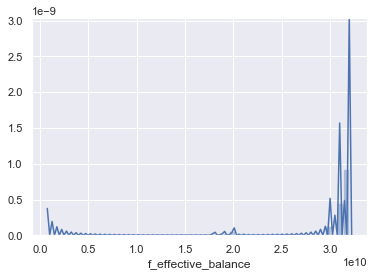

In [26]:
sns.distplot(df['f_effective_balance'])

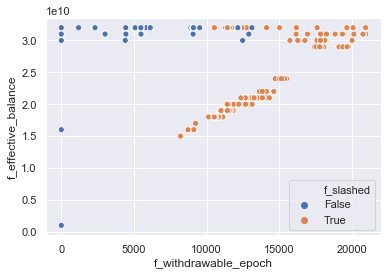

In [15]:
sns.scatterplot(df['f_withdrawable_epoch'], df['f_effective_balance'], hue=df['f_slashed'],x_jitter=)

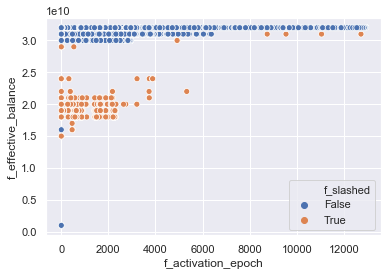

In [17]:
sns.scatterplot(df['f_activation_epoch'], df['f_effective_balance'], hue=df['f_slashed'])

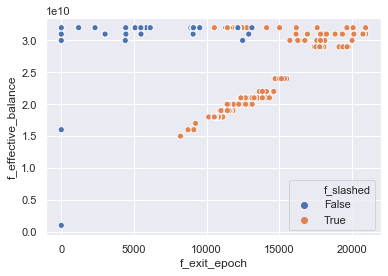

In [19]:
sns.scatterplot(df['f_exit_epoch'], df['f_effective_balance'], hue=df['f_slashed'])

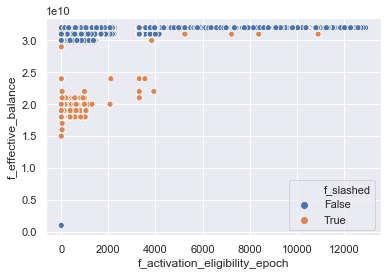

In [18]:
sns.scatterplot(df['f_activation_eligibility_epoch'], df['f_effective_balance'], hue=df['f_slashed'])

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, MeanShift
from sklearn import mixture

In [24]:
# Scale relevant features
scaler = StandardScaler()
df_slashed_dummies = df['f_slashed'].get_dummies()

In [2]:
# Relevant columns
# f_index                         75183 non-null  int64 
# f_slashed                       75183 non-null  bool  [APPEND DUMMIFIED VERSION AFTER SCALING]
# f_activation_eligibility_epoch  75183 non-null  int64 
# f_activation_epoch              75183 non-null  int64 
# f_exit_epoch                    75183 non-null  int64 
# f_withdrawable_epoch            75183 non-null  int64 
# f_effective_balance  

In [20]:
km = KMeans(n_clusters=5)

In [ ]:
km.fit(df[['f_slashed',]])